#  CS 247 : Advanced Data Mining Learning
## Homework 1

### Due: 11:59 pm 04/08

##### Please read the Homework Guidance (uploaded to CCLE) carefully and make sure you fulfill all the requirements.

__Name__: [Wei Zhou]

__UID__: [505650843]



## Problem 1: Multinomial Naive Bayes (20 pts)

Consider the Multinomial Naive Bayes introduced in lecture 02 - Probabilistic Classifiers (please refer to page 14-22). Show the derivation process to obtain the solution of the MLE estimator β. Please use the same notations as in the lecture slides.

__Hint__: The solution of β is given on slide P21.

#### Write Your answer here:

https://drive.google.com/file/d/1luccwa0LfOlVofZC-6BEj36nPV7d7YhO/view?usp=sharing

the image upload does not work well with large files. 

Here's the answer png

## Problem 2: Sentimate Classification (80 pts)

In this problem, you are going to apply the multinomial naive bayes method learned in the lecture on a real-world sentiment classification dataset. 

We've provided a general framework for you, please fill all the ''TODO'' slots.

### Part 1: Sklearn Implementation (10 pts)

In this part, you are going to work on the sentimate classification task using the multinomial naive bayes function __MultinomialNB__ implemented in the sklearn package. We've provided the data processing parts, please implememt the code for training and testing, and get the probability result using ***pred_proba*** and ***pred_log_proba***.


__Hint__: 

1. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html to get familiar with sklearn MultinomialNB function.

2. To get the predicted results, instead of directly using the ***predict*** function in MultinomialNB, please use <u>***np.argmax(..., axis=1)***</u>, and the ... part should be the probability result obtained from ***pred_proba*** or ***pred_log_proba***.


In [ ]:
# load dataset, split train and test 

from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian',  'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

In [ ]:
# data processing, turn the loaded data into array

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

count_vect = CountVectorizer().fit(twenty_train['data'] + twenty_test['data']) 
X_train_feature = count_vect.transform(twenty_train['data']).toarray()
X_test_feature  = count_vect.transform(twenty_test['data']).toarray()

In [ ]:
# train and test with MultinomialNB

from sklearn.naive_bayes import MultinomialNB
import numpy as np

###TO DO: 
''' 
    Please implement train and test using sklearn MultinomialNB.
    You are expected to get the probability result using "pred_proba" and "pred_log_proba".'''
sk_model = MultinomialNB()
sk_model = sk_model.fit(X_train_feature, twenty_train.target)

sk_proba_preds = np.argmax(sk_model.predict_proba(X_test_feature), axis=1)
sk_log_proba_preds= np.argmax(sk_model.predict_log_proba(X_test_feature), axis=1)

print(sk_proba_preds)
print(sk_log_proba_preds)

[2 2 2 ... 2 2 1]
[2 2 2 ... 2 2 1]


### Part 2: Your Multinomial Naive Bayes Implementation (50 pts = 15 + 15 + 15 + 5)

In this part, you are going to implement multinomial naive bayes function by your self, then use your own multinomial naive bayes function to finish the sentimate classification task, and get the probability result using ***predict_proba_without_log*** and ***predict_proba_with_log***.

Hint: Similar to Part 1, to get the predicted results, please use <u>***np.argmax(..., axis=1)***</u>, and the ... part should be the probability result obtained from ***predict_proba_without_log*** and ***predict_proba_with_log***.


In [ ]:
# My Multinomial Naive Bayes Function

class My_MultinomialNB():
    """
    Multinomial Naive Bayes
    ==========  
    Parameters
    ----------
    alpha : float, optional (default=1.0)
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).
    """

    def __init__(self, alpha=1):
        self.alpha = alpha
        

    def fit(self, X, y):
#         Given feature X and label y, calculate beta and pi with a smoothing parameter alpha (laplace smoothing)
        self.class_indicator = {}
        for i, c in enumerate(np.unique(y)):
            self.class_indicator[c] = i
        self.n_class = len(self.class_indicator)
        self.n_feats = np.shape(X)[1]
        
        self.beta    = np.zeros((self.n_class, self.n_feats))
        self.pi      = np.zeros((self.n_class))
        '''
            TODO: 
            Please calculate self.beta and self.pi
        '''
        self.idx = [[] for _ in range(self.n_class)]
        for i,c in self.class_indicator.items():
            self.idx[i] = (y == c)
            self.beta[i] = (np.sum(X[self.idx[i]],axis = 0) + self.alpha)/(np.sum(X[self.idx[i]]) + self.alpha)
            self.pi[i] = self.idx[i].shape[0]/self.n_feats
        
        self.log_beta = np.log(self.beta)
        self.log_pi   = np.log(self.pi)
          
    
    def predict_proba_without_log(self, X):
#         Given a test dataset with feature X, calculate the predicted probability of each data point
        prob = np.zeros((len(X), self.n_class))
                       
        '''
            TODO: 
            Calculate probability of which class each data belongs to, using self.beta and self.pi
        '''
        for i in range(len(X)):
          for j in range(self.n_class):
            prob[i,j] = np.prod(np.power(self.beta[j],X[i]))*self.pi[j]
        return prob
    
    
    def predict_proba_with_log(self, X):
        log_prob = self.predict_log_proba_with_log(X)
        return np.exp(log_prob - np.max(log_prob, axis=1).reshape(-1, 1))
    
    
    def predict_log_proba_with_log(self, X):
#         Given a test dataset with feature X, calculate the log probability of each data point
        log_prob = np.zeros((len(X), self.n_class))
        '''
            TODO: 
            Calculate log-probability of which class each data belongs to, using self.log_beta and self.log_pi
        '''
        for i in range(len(X)):
          for j in range(self.n_class):
            log_prob [i,j] = np.sum(self.log_beta[j]*X[i]) + self.log_pi[j]
        
        return log_prob

In [ ]:
# train and test with My_MultinomialNB
'''
    TO DO: 
    Please implement train and test using My_MultinomialNB you implemented above.
    You are expected to get the probability result using "predict_proba_without_log" and "predict_proba_with_log".
    For this part, please use the default alpha value: alpha = 1.
'''
my_model= My_MultinomialNB()
my_model.fit(X_train_feature,twenty_train.target)
proba = my_model.predict_proba_without_log(X_test_feature)
log_proba = my_model.predict_log_proba_with_log(X_test_feature)

my_proba_preds =np.argmax(proba, axis=1)
my_log_proba_preds =np.argmax(log_proba, axis=1)

def accuracy(y_true, y_pred):
    acc = np.equal(y_true, y_pred)
    score = sum(acc)/len(acc) # calculate the percentage of the correctness
    return score
print(my_proba_preds)
print(my_log_proba_preds)
print (accuracy(twenty_test.target, my_proba_preds))
print (accuracy(twenty_test.target, my_log_proba_preds))



[0 0 0 ... 0 2 1]
[2 2 2 ... 2 2 1]
0.36950732356857524
0.9320905459387483


### Part 3: Complare sklearn MultinomialNB and your own My_MultinomialNB (10 pts = 1 + 1 + 1 + 1 + 2 + 4)

In part 1 and part 2, you've calculated the probability of test data using ***pred_proba*** and ***pred_log_proba***, and ***predict_proba_without_log*** and ***predict_proba_with_log***. 

Please answer:
1. Compare the accuracy, are they same or not? 
2. If they are different, please try to explain the reason.

In [ ]:
def accuracy(y_true, y_pred):
    acc = np.equal(y_true, y_pred)
    score = sum(acc)/len(acc) # calculate the percentage of the correctness
    return score

# accuracy of sklearn MultinomialMB without log
'''
    TO DO: compute accuracy of sklearn MultinomialMB without log and print it out
'''
print ("accuracy of sklearn MultinomialMB without log:", accuracy(twenty_test.target, sk_proba_preds))



# accuracy of My_MultinomialMB without log
'''
    TO DO: compute accuracy of My_MultinomialMB without log and print it out
'''
print ("accuracy of My_MultinomialMB without log:",accuracy(twenty_test.target, my_proba_preds))

# accuracy of sklearn MultinomialMB with log
'''
    TO DO: compute accuracy of sklearn MultinomialMB with log and print it out
'''

print ("accuracy of sklearn MultinomialMB with log:",accuracy(twenty_test.target, sk_log_proba_preds))


# accuracy of My_MultinomialMB with log 
'''
    TO DO: compute accuracy of My_MultinomialMB with log and print it out
'''
print ("accuracy of My_MultinomialMB with log:",accuracy(twenty_test.target, my_log_proba_preds))

accuracy of sklearn MultinomialMB without log: 0.9347536617842876
accuracy of My_MultinomialMB without log: 0.36950732356857524
accuracy of sklearn MultinomialMB with log: 0.9347536617842876
accuracy of My_MultinomialMB with log: 0.9320905459387483


#### Write Your answer here:

1. The sklearn MultinomialNB have identical accuracy for both with and without log; however, the implementation of My_MultinomialNB have different accuracy for with and without log. As a matter of fact, they're significantly different. Without log has a way lower accuracy, while the with log version has similar to sklearn accuracy. 

2. When we implement non-log ourselves, the return is most likely zero, since we are multiplying a very small value. Hence the probablity and prediction is very close to zero most of the them. Which will have likely bad prediction accuracy. It's an underflowing problem from the way we calculate it. 

### Part 4: Tune alpha (10pts = 2 + 2 + 2 + 4)

Now,  choose different laplacian smoothing parameter ***alpha***, including (0, 0.001, 0.01, 0.1, 1, 10, 100, 1000), show the accuracy of your model using ***pred_log_proba***. Plot the accuracy curve with different ***alpha*** using *matplotlib* package. 
    
Please answer: 
1. What is the best ***alpha***? 
2. Please explain why when ***alpha*** = 0 and ***alpha*** = 1000, the performance is relatively worse than the best case.


In [ ]:
# for different alpha, print the accuracy of your model

accs = []
alpha_list = [0, 0.001, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_list:
    '''
        TO DO: Train the model with different alpha, and get corresponding accuracy
    '''
    my_model= My_MultinomialNB(alpha)
    my_model.fit(X_train_feature,twenty_train.target)
    log_proba = my_model.predict_log_proba_with_log(X_test_feature)
    my_log_proba_preds =np.argmax(log_proba, axis=1)
    accs.append(accuracy(twenty_test.target,my_log_proba_preds))
print(accs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in multiply


[0.21238348868175766, 0.9447403462050599, 0.9513981358189081, 0.9320905459387483, 0.8462050599201065, 0.4440745672436751, 0.2589880159786951, 0.2589880159786951]


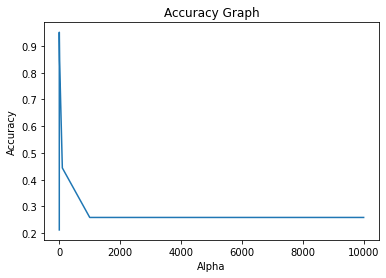

In [ ]:
# Visualization: plot accuracy curve with different alpha

import matplotlib.pyplot as plt

'''
    TO DO: plot accuracy curve with different alpha with matplotlib package
'''
plt.figure()
plt.plot(alpha_list,accs)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.show()

#### Write Your answer here:

1. Alpha is best at 0.01 as shown in graph. 
2. In Multinomial Naive Bayes, the alpha parameter is what is known as a hyperparameter which controls the form of the model itself. I noticed that when alpha = 0 the accuracy is very very low, (Laplace/Lidstone) smoothing parameter alpha when it's set to zero, it means there's no smoothing hence the low accuracy. 
Alpha = 10000 is too large, in this case the smoothing parameter influence of observed counts will be lower because estimated probabilities for the same amount of observations will also be lower.

# **Citation**

NaiveBayes understanding:  https://www.math.snu.ac.kr/~hichoi/machinelearning/lecturenotes/NaiveBayes.pdf

MLE for NaiveBayes understanding: http://www.cs.columbia.edu/~mcollins/em.pdf

Alpha understanding: https://stackoverflow.com/questions/33830959/multinomial-naive-bayes-parameter-alpha-setting-scikit-learn

Building MNB: https://stackoverflow.com/questions/60969884/multinomial-naive-bayes-for-python-from-scratch

Separate Study Group Conversations: Yuntian Wang, Kevan Loo, Jessica Bojorquez 